Igor Hołowacz, Justyna Baczyńska

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import random
import ctypes
from collections import deque
from math import factorial

Zad. 1

In [3]:
class Empty(Exception):
    pass

class DynamicArray:
    def __init__(self):
        self._n = 0 #liczba elementów
        self._capacity = 1 #rozmiar tablicy
        self._A = self._make_array(self._capacity) #właściwa tablica
        
    def __len__(self):
        return self._n
    
    def __getitem__(self,k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]
    
    def append(self,obj):
        if self._n == self._capacity:
            self._resize(2*self._capacity)
        self._A[self._n] = obj
        self._n += 1
        
    def _resize(self,c):
        B = self._make_array(c)
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B
        self._capacity = c
        
    def _make_array(self,c):
        return (c*ctypes.py_object)()
    
    def insert(self,index,value):
        if index<0 or index>self._n:
            raise IndexError("Index out of range")

        if self._n == self._capacity:
            self._resize(2*self._capacity)
        
        for i in range (self._n-1,index-1,-1):
            self._A[i+1] = self._A[i]

        self._A[index] = value
        self._n+=1

    def remove(self,value):
        if self._n == 0:
            raise Empty("Dynamic array is empty")
        i=0
        found_value = False
        while i<self._n and not(found_value):
            if self._A[i]==value:
                found_value = True
            else:
                i+=1
        if found_value:
            for j in range(i,self._n-1):
                self._A[j]=self._A[j+1]
            self._A[self._n-1]=None
            self._n-=1
        else:
            raise ValueError("No such value in Dynamic Array")
    def expand(self,seq):
        for obj in seq:
            self.append(obj)

    def __str__(self):
        represent = "{:"
        for i in range(self._n):
            represent+=f":{self._A[i]}:"
        represent+=":}"
        return(represent)

In [64]:
A = DynamicArray()
A.append(1)
A.expand([2,3,4])
A.insert(2,10)
print(len(A))
print(A[1])
A.remove(1)
print(A)

5
2
{::2::10::3::4::}


In [4]:
B=DynamicArray()
B.remove(0)

Empty: Dynamic array is empty

In [5]:
C=DynamicArray()
C.expand([1,2])
C.remove(3)

ValueError: No such value in Dynamic Array

zad. 2

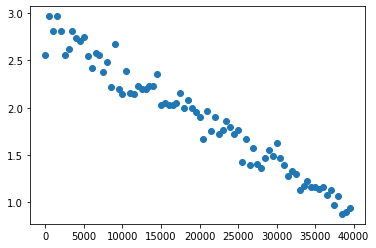

In [59]:
n=[]
times = []
for i in range(0,40000,500):
    arr = [0 for _ in range(80001)]
    start = time.process_time()
    for _ in range(0,40000): 
        arr.pop(i)
    end = time.process_time()
    n.append(i)
    times.append(end-start)

plt.scatter(n,times)
plt.show()

Zad. 3

In [4]:
def sum_nxn(arr):
    n=len(arr)
    total = 0
    for i in range(n):
        if len(arr[i])==n:
            total += sum(arr[i])
        else:
            raise ValueError("Array length mismatch")
    return total

In [5]:
sum_nxn([[1,2],[3,4]])

10

In [6]:
sum_nxn([[1,2],[3,4,5]])

ValueError: Array length mismatch

Zad. 4

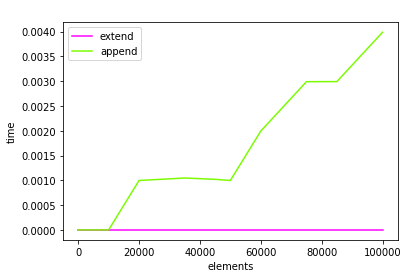

In [64]:
def time_extend(elements):
    c = [1 for i in range(elements)]
    lista = []
    start = time.time()
    lista.extend(c)
    end = time.time()
    return end-start

def time_append(elements):
    lista = []
    start = time.time()
    for item in range(elements):
        lista.append(1)
    end = time.time()
    return end-start

numbers = [0, 5000, 10000 ,20000, 35000, 45000, 50000, 60000, 75000, 85000, 100000]

times_extend = [time_extend(n) for n in numbers]
times_append = [time_append(n) for n in numbers]

ax1 = plt.subplot(111)
ax1.plot(numbers, times_extend, color='magenta', label = "extend")
ax1.plot(numbers, times_append, color="lawngreen", label = "append")
ax1.set_title(" ")
ax1.legend()
ax1.set_xlabel("elements")
ax1.set_ylabel("time")

plt.show()

Zad. 5

In [7]:
class Queue:
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None]*Queue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        if self._size <= 2*len(self._data):
            self._resize(int(len(self._data)/2))
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        return value
    
    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1
        
    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size): # only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0    

    def __str__(self):
        return str(self._data)

In [9]:
Q = Queue()
print(Q)
print(len(Q))

Q.enqueue(1)
Q.enqueue(2)
print(Q)
print(len(Q))

Q.dequeue()
print(Q)
print(len(Q))

Q.dequeue()
print(Q)
print(len(Q))

Q.enqueue(1)
Q.enqueue(2)
Q.enqueue(3)
print(Q)

Q.enqueue(4)
Q.enqueue(5)
print(Q)

[None, None, None, None, None, None, None, None, None, None]
0
[1, 2, None, None, None, None, None, None, None, None]
2
[None, 2, None, None, None]
1
[None, None]
0
[1, 2, 3, None]
[1, 2, 3, 4, 5, None, None, None]


In [8]:
Q1=Queue()
Q1.dequeue()

Empty: Queue is empty

Zad. 6

In [9]:
class Deque:
    DEFAULT_CAPACITY = 5
    def __init__(self):
        self._data = [None]*Deque.DEFAULT_CAPACITY
        self._size = 0
        self._left = 0  # front
        self._right = 0  # rear

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('DQueue is empty')
        return self._data[self._left]

    def last(self):
        if self.is_empty():
            raise Empty('DQueue is empty')
        return self._data[self._right-1] 

    def delete_first(self):
        if self.is_empty():
            raise Empty('DQueue is empty')
        value = self._data[self._left]
        self._data[self._left] = None
        self._left = (self._left+1)%len(self._data)
        self._size -= 1
        return value

    def delete_last(self):
        if self.is_empty():
            raise Empty('DQueue is empty')
        if self._right==0:
            self._right = len(self._data)-1
        else:
            self._right = self._right -1 
        value = self._data[self._right]
        self._data[self._right] = None
        self._size -= 1
        return value
    
    def add_last(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        self._data[self._right] = e
        self._right = (self._right+1)%len(self._data)
        self._size += 1

    def add_first(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        if self._left==0:
            self._left = len(self._data)-1
        else:
            self._left = self._left - 1 
        self._data[self._left] = e
        self._size += 1

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._left
        for k in range(self._size): # only existing elements
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._left = 0
        self._right = self._size
    
    def __str__(self):
        return str(self._data)

In [4]:
# przykład z wykładu - funkcja sprawdzająca czy wyraz jest palindromem
def is_palindrome(word):
    D = Deque()
    for ch in word:
        D.add_last(ch)
    still_equal = True
    while len(D)>1 and still_equal:
        first = D.delete_first()
        last = D.delete_last()
        if first != last:
            still_equal = False
    return still_equal

In [5]:
D = Deque()
D.add_last(5)
print(D)
D.add_first(3)
print(D)
D.add_first(7)
print(D)
print("D.first: ", D.first())
print("D.delete_last ", D.delete_last())
print("len(D): ", len(D))
print("D.is_empty():", D.is_empty())

slowo = 'hanna'
print(f"czy {slowo} jest palindromem: ", is_palindrome(slowo))
slowo1 = 'radar'
print(f"czy {slowo1} jest palindromem: ", is_palindrome(slowo1))

[5, None, None, None, None]
[5, None, None, None, 3]
[5, None, None, 7, 3]
D.first:  7
D.delete_last  5
len(D):  2
D.is_empty(): False
czy hanna jest palindromem:  False
czy radar jest palindromem:  True


In [71]:
A=Deque()
A.add_last(1)
A.add_last(1)
A.add_last(1)
A.add_last(1)
A.add_last(1)
A.delete_first()
A.add_last(2)
A.add_last(2)
print(A)
print(A.first())
print(A.last())

[1, 1, 1, 1, 2, 2, None, None, None, None]
1
2


In [10]:
B=Deque()
B.delete_first()

Empty: DQueue is empty

zad. 7

In [13]:
class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return self._data == []
    
    def push(self,e):
        self._data.append(e)
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()        

    def last(self):
        return self._data[len(self._data)-1]

    def __str__(self):
        return str(self._data)


# Funkcja check_html bazuje na dwóch stosach. Pierwszy z nich (s) odpowiada za sprawdzenie czy 
# każdy znacznik <.> ma swoje domknięcie </.>. Drugi (brackets) sprawdza czy każdy "<" ma odpowiadający ">". 
# Składnia będzie poprawna, gdy oba stosy po wykonaniu programu będą puste.

def ignore_comments(list):
    """Deletes html comments from list for further analysys

    Args:
        list (list): list of signs read from html file

    Returns:
        [list]: list of signs without comments
    """
    start_com = [i for i in range(len(list)) if list[i:i+4]==["<","!", "-", "-"]]
    stop_com = [i+3 for i in range(len(list)) if list[i:i+3]==[ "-", "-", ">"]]
    stop_com.insert(0,0)
    start_com.append(len(list))
    temp_list = []
    
    for i in range(len(start_com)):
        temp_list += list[stop_com[i]:start_com[i]] 
    return temp_list

def check_html(html_file):
    """Checks if every opening tag has prper closing tag and angle brackets are balanced.

    Args:
        html_file (str): name of html file

    Returns:
        (bool): True if everything is balanced, otherwise False
    """
    s = Stack()
    no_closure = ["area", "base", "embed", "param","keygen","menuitem", "source", "track", "wbr",
                    "!DOCTYPE","br","meta", "link", "img","col", "command","hr","input"]

    with open(html_file,'r', encoding="utf-8") as f:
        t = list(f.read())
    
    t1= ignore_comments(t)
    brackets = Stack()
    for i in range(len(t1)):
        if t1[i] == "<":
            brackets.push("<")
            i+=1
            content = ""
            while t1[i] != ">":
                content += t1[i]
                i+=1
            content = content.split(" ")[0]
            if s.is_empty() and (content not in no_closure):
                s.push(content)
            else:
                if content in no_closure:
                    pass
                elif content == "/" + s.last():
                    s.pop()
                else:
                    s.push(content)
        elif t1[i] == ">":
            if brackets.last() == "<":
                brackets.pop()
    if s.is_empty() and brackets.is_empty() :
        print("everything is ok")
        return True
    elif brackets.is_empty():
        print("Tag is not closed!")
        return False
    else:
        print("Missing '<' or '>' sign")
        return False

In [72]:
check_html("C:\\Users\\igorh\\algorytmy i struktury danych\\test.html")

Tag is not closed!


False

zad. 8

In [14]:
def permutations_stack(items):
    """
    Non recursive function to permutations of list using stack

    Parameters:
    items(list) - list of elements

    Returns:
     list - list of permutations
    """
    items = list(items)
    n = len(items)
    s = Stack()
    i = 0
    perm = []
    perms=[]
    while i < n:
        perm.append(items.pop(0))
        s.push(i)
        i = 0
        
        if len(items) == 0:
            perms.append(list(perm))
            
            while i == len(items) and len(s)!=0:
                i = s.pop()
                items.append(perm.pop())
                i += 1
    return perms

In [15]:
permutations_stack(["A","B","C"])

[['A', 'B', 'C'],
 ['A', 'C', 'B'],
 ['B', 'C', 'A'],
 ['B', 'A', 'C'],
 ['C', 'A', 'B'],
 ['C', 'B', 'A']]

In [73]:
permutations_stack([1,2,3,4])

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 4, 2],
 [1, 3, 2, 4],
 [1, 4, 2, 3],
 [1, 4, 3, 2],
 [2, 3, 4, 1],
 [2, 3, 1, 4],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [2, 1, 3, 4],
 [2, 1, 4, 3],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [3, 1, 2, 4],
 [3, 1, 4, 2],
 [3, 2, 4, 1],
 [3, 2, 1, 4],
 [4, 1, 2, 3],
 [4, 1, 3, 2],
 [4, 2, 3, 1],
 [4, 2, 1, 3],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

Zad. 9

In [16]:
class Queue1:
    DEFAULT_CAPACITY = 10
    def __init__(self):
        self._data = [None]*Queue1.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
    
    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        value = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front+1)%len(self._data)
        self._size -= 1
        return value

    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        avail = (self._front + self._size)%len(self._data)
        self._data[avail] = e
        self._size += 1

    def _resize(self,cap):
        old = self._data
        self._data = [None]*cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk)%len(old)
        self._front = 0  

    def __str__(self):
        return str(self._data)      

# implementacja stosu przy użyciu jednej kolejki

class Stack_Q:
    def __init__(self):
        self._Q = Queue1()   # nowy pusty stos jako kolejka 
        
    def __len__(self):
        return len(self._Q)
    
    def is_empty(self):
        return self._Q.is_empty()
    
    def push(self,e):
        # wstawiam do kolejki, zlozonosci O(1) 
        self._Q.enqueue(e)   
        
    def top(self):  
        # zlozonosci O(n), gdzie n to liczba elementow na stosie 
        # ogólnie O(n)*złozonosc wstawienia do kolejki
        if self.is_empty():
            raise Empty('Stack is empty')
        for i in range(len(self._Q)-1):    
            # usuwamy z kolejki i wstawiamy wszystkie elementy oprócz ostatniego wstawionego do kolejki  
            self._Q.enqueue(self._Q.dequeue())
        x = self._Q.first()     # ostatnio wstawiony element 
        self._Q.enqueue(self._Q.dequeue())      # wstawiam go znowu
        return x        # zwracam element zapamietany
    
    def pop(self):
        # zlozonosci O(n), gdzie n to liczba elementow na stosie
        # to samo co wczesniej, ale nie wstawiamy tego ostatniego tylko go usuwam z kolejki
        if self.is_empty():
            raise Empty('Stack is empty')
        for i in range(len(self._Q)-1):
            self._Q.enqueue(self._Q.dequeue())
        return self._Q.dequeue()
    def __str__(self):
        return str(self._Q)

In [76]:
S = Stack_Q()
S.push(5)
print(S)
S.push(3)
print(S)
print("len(S) = ", len(S))
print("S.pop() = ", S.pop())
print(S)
print("S.is_empty = ", S.is_empty())
print("S.top() = ", S.top())
print("S.pop() = ", S.pop())
print(S)
print("S.is_empty = ", S.is_empty())
S.push(1)
print(S)
print(S.top())
# sprawdznie przez zastosowanie funkcji z wykladu
def reverse_sequence(seq):
    print(seq)
    SQ = Stack_Q()
    for i in seq:
        SQ.push(i)
        
    for _ in range(len(SQ)):
        print(SQ.pop(),end=", ")

reverse_sequence('python')

[5, None, None, None, None, None, None, None, None, None]
[5, 3, None, None, None, None, None, None, None, None]
len(S) =  2
S.pop() =  3
[None, None, 5, None, None, None, None, None, None, None]
S.is_empty =  False
S.top() =  5
S.pop() =  5
[None, None, None, None, None, None, None, None, None, None]
S.is_empty =  True
[None, None, None, None, 1, None, None, None, None, None]
1
python
n, o, h, t, y, p, 

In [17]:
S1=Stack_Q()
S1.top()

Empty: Stack is empty

In [18]:
S2=Stack_Q()
S2.pop()

Empty: Stack is empty

Zad. 10

In [23]:
class Queue2:
    def __init__(self):
        self.s1 = Stack()
        self.s2 = Stack()

    def __len__(self):
        return len(self.s1)+len(self.s2)
        
    def enQueue(self, x):
        self.s1.push(x)

    def deQueue(self):
        if len(self.s1) == 0 and len(self.s2) == 0:
            raise Empty("Queue is empty")

        elif len(self.s2) == 0 and len(self.s1) > 0:
            while len(self.s1):
                temp = self.s1.pop()
                self.s2.push(temp)
            return self.s2.pop()

        else:
            return self.s2.pop()

In [24]:
q = Queue2()
q.enQueue(1)
q.enQueue(2)
q.enQueue(3)
print(len(q))
print(q.deQueue())
print(q.deQueue())
print(q.deQueue())

3
1
2
3


In [31]:
q1 = Queue2()
q1.enQueue(1)
q1.enQueue(2)
print(q1.deQueue())

q1.enQueue(3)
print(q1.deQueue())
print(q1.deQueue())

print(len(q1))

1
2
3
0


In [22]:
Q = Queue2()
Q.deQueue()

Empty: Queue is empty